Xshape: torch.Size([300, 1]) 
 Yshape: torch.Size([300, 1])


<ipython-input-1-b43c1ea726df>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


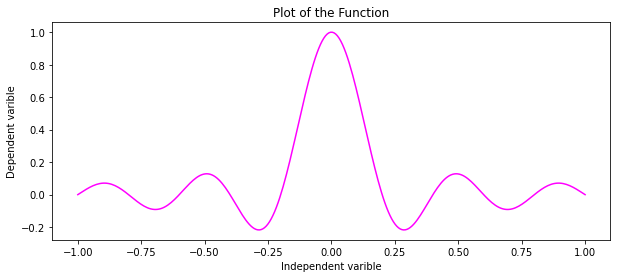

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import math
import gc
#1st Function
#Creating the data using fiest funtion

torch.manual_seed(1) 
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)
y = (np.sin(5*np.pi*x))/(5*np.pi*x)
print('Xshape:',x.shape,"\n Yshape:",y.shape)
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "magenta")
plt.title('Plot of the Function')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.savefig('fun1.png')
plt.show()
n_samples, n_features = x.shape

In [ ]:
def train_func(model,x,y):
    model.train()
    max_epoch = 25000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    #x = x.to('cuda')
    while not_converged:
        epoch += 1
        prediction = model(x)     # input x and predict based on x
        loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step() 
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())
        
        if epoch%100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}', end='\r', flush= True) #, weight = {model.weight.item()},  bias ={model.bias.item()}')
                
        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False
        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print(f"Convergeance reached for loss:{loss_arr[-1]:.4f} at epoch: {epoch}")
                not_converged = False
                
    return epoch_arr,loss_arr,prediction

In [ ]:
def paramerter_count(m,i):
  a=[]
  for i in m.parameters():
    a.append(torch.numel(i))
  print('Total no of parameters in Model :'+str(i), np.sum(a),)
def model_weight(m,flag,i):
   if flag:
    print("\nModel "+str(i)+" weight and bias before training\n")
   else:print("\nModel "+str(i)+" weight and bias after training\n")
   for param in m.state_dict():
      print(param, "\t",m.state_dict()[param])

In [ ]:
class M1(torch.nn.Module):
    def __init__(self):
        super(M1, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 5)
        self.hidden2 = torch.nn.Linear(5, 10)
        self.hidden3 = torch.nn.Linear(10, 10)
        self.hidden4 = torch.nn.Linear(10, 10)
        self.hidden5 = torch.nn.Linear(10, 10)
        self.hidden6 = torch.nn.Linear(10, 10)
        self.hidden7 = torch.nn.Linear(10, 5)
        self.predict = torch.nn.Linear(5, 1)

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.hidden1(x))
        x = torch.nn.functional.leaky_relu(self.hidden2(x))
        x = torch.nn.functional.leaky_relu(self.hidden3(x))
        x = torch.nn.functional.leaky_relu(self.hidden4(x))
        x = torch.nn.functional.leaky_relu(self.hidden5(x))
        x = torch.nn.functional.leaky_relu(self.hidden6(x))
        x = torch.nn.functional.leaky_relu(self.hidden7(x))
        x = self.predict(x)
        return x

m1 = M1() # define the network and move to GPU
optimizer = torch.optim.Adam(m1.parameters(), lr=0.0012, weight_decay=1e-4)
loss_func = torch.nn.MSELoss()

Total no of parameters in Model :Parameter containing:
tensor([0.3165], requires_grad=True) 571

Model 1 weight and bias before training

hidden1.weight 	 tensor([[ 0.5153],
        [-0.4414],
        [-0.1939],
        [ 0.4694],
        [-0.9414]])
hidden1.bias 	 tensor([ 0.5997, -0.2057,  0.5087,  0.1390, -0.1224])
hidden2.weight 	 tensor([[ 0.1240,  0.0221,  0.1633, -0.1743, -0.0326],
        [-0.0403,  0.0648, -0.0018,  0.3909,  0.1392],
        [-0.1665, -0.2701, -0.0750, -0.1929, -0.1433],
        [ 0.0214,  0.2666,  0.2431, -0.4372,  0.2772],
        [ 0.1249,  0.4242,  0.2952, -0.4075, -0.4252],
        [-0.2157,  0.3927, -0.0745,  0.1914, -0.2078],
        [ 0.4388, -0.1892,  0.3354,  0.0053, -0.2356],
        [ 0.2299, -0.2374,  0.1315, -0.1291, -0.0490],
        [-0.4299, -0.2132,  0.2427, -0.1087,  0.4454],
        [ 0.3585, -0.0209, -0.2985,  0.2723,  0.1388]])
hidden2.bias 	 tensor([-0.2891,  0.2905,  0.2715,  0.3966, -0.2507, -0.0736, -0.0087,  0.0653,
        -0.3394, 

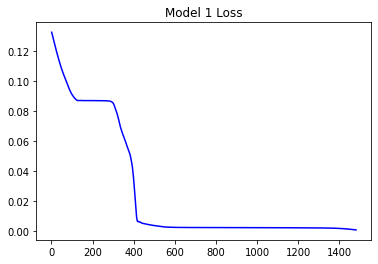

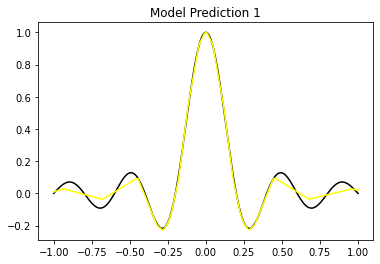

In [ ]:
paramerter_count(m1,1)
model_weight(m1,1,1)
M1epoch_arr,M1loss_arr,M1prediction = train_func(m1,x,y)
model_weight(m1,0,1)
plt.plot(M1epoch_arr,M1loss_arr,color="blue")
plt.title('Model 1 Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,M1prediction.data.numpy(),color="yellow")
plt.title('Model Prediction 1')
plt.show()


In [ ]:
class M2(torch.nn.Module):
    def __init__(self,):
        super(M2, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 10)   # hidden layer
        self.hidden2 = torch.nn.Linear (10, 18)
        self.hidden3 = torch.nn.Linear (18, 15)
        self.hidden4 = torch.nn.Linear (15, 4)
        self.predict = torch.nn.Linear(4, 1)   # output layer
        #self.activation = nn.LeakyReLU()
        
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      # activation function for hidden layer
        x = F.leaky_relu(self.hidden2(x))
        x = F.leaky_relu(self.hidden3(x))
        x = F.leaky_relu(self.hidden4(x))
        x = self.predict(x)                    # linear output
        return x

m2 = M2()    # define the network
#optimizer = torch.optim.RMSprop(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
optimizer = torch.optim.Adam(m2.parameters(), lr=0.0012, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()

Total no of parameters in Model :Parameter containing:
tensor([0.4854], requires_grad=True) 572

Model 3 weight and bias before training

hidden1.weight 	 tensor([[-0.1516],
        [-0.8101],
        [-0.7396],
        [-0.2935],
        [-0.2215],
        [ 0.1141],
        [-0.2243],
        [ 0.3690],
        [-0.3326],
        [ 0.7340]])
hidden1.bias 	 tensor([ 0.2297, -0.3074,  0.8912,  0.2553, -0.6796, -0.5565,  0.6270,  0.4567,
         0.7808, -0.0768])
hidden2.weight 	 tensor([[ 0.2212,  0.1572,  0.0978, -0.0732,  0.3048,  0.0640, -0.0816, -0.0045,
          0.3109,  0.2124],
        [-0.0234,  0.3100,  0.1389, -0.1684, -0.2878,  0.1838,  0.2966, -0.1842,
          0.1299,  0.0135],
        [-0.0676, -0.0860,  0.0880,  0.0697,  0.2136,  0.1158,  0.1439,  0.2790,
          0.0985,  0.0469],
        [-0.1151,  0.2319,  0.0467,  0.2038,  0.3054, -0.0707,  0.2227, -0.0642,
          0.2854,  0.2489],
        [-0.1133,  0.0113, -0.1381, -0.1279, -0.0640, -0.0022, -0.1102, -0.2985

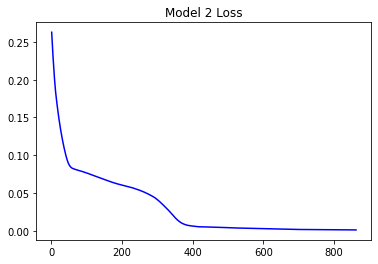

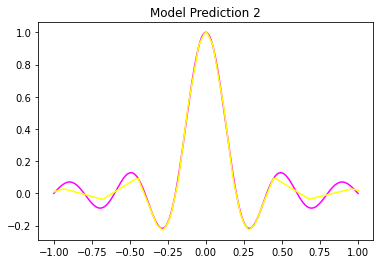

10145

In [ ]:
paramerter_count(m2,3)
model_weight(m2,1,3)
M2epoch_arr,M2loss_arr,M2prediction = train_func(m2,x,y)
model_weight(m2,0,3)
#plot
plt.plot(M2epoch_arr,M2loss_arr,color="blue")
plt.title('Model 2 Loss')
plt.show()
#plot
plt.plot(x.numpy(),y.numpy(),color="magenta")
plt.plot(x,M1prediction.data.numpy(),color="yellow")
plt.title('Model Prediction 2')
plt.show()
torch.cuda.empty_cache()
gc.collect()

In [ ]:
class M3(torch.nn.Module):
    def __init__(self,):
        super(M3, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 190)   # hidden layer
        self.predict = torch.nn.Linear(190, 1)   # output layer
        #self.activation = nn.LeakyReLU()
        
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      # activation function for hidden layer
        x = self.predict(x)                    # linear output
        return x

m3 = M3()     # define the network
optimizer = torch.optim.Adam(m3.parameters(), lr=0.0011, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() # this is for regression mean squared loss

Total no of parameters in Model :Parameter containing:
tensor([0.0330], requires_grad=True) 571

Model 3 weight and bias before training

hidden1.weight 	 tensor([[-0.0454],
        [ 0.1646],
        [-0.2346],
        [-0.6331],
        [-0.4523],
        [-0.0664],
        [-0.8181],
        [-0.8082],
        [ 0.1097],
        [-0.6507],
        [-0.5439],
        [-0.0086],
        [-0.5270],
        [ 0.9256],
        [-0.3610],
        [-0.5560],
        [-0.2664],
        [-0.8159],
        [ 0.5152],
        [ 0.8592],
        [-0.5767],
        [-0.3717],
        [ 0.9333],
        [-0.7234],
        [ 0.2708],
        [-0.8148],
        [-0.8900],
        [ 0.0015],
        [-0.5707],
        [ 0.5416],
        [-0.3093],
        [ 0.0099],
        [-0.5221],
        [ 0.4109],
        [ 0.9265],
        [-0.1503],
        [-0.6172],
        [-0.9753],
        [ 0.9583],
        [ 0.4215],
        [ 0.4130],
        [ 0.1703],
        [ 0.5018],
        [ 0.3551],
        [

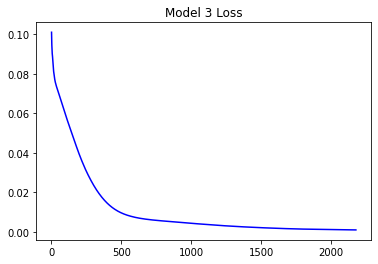

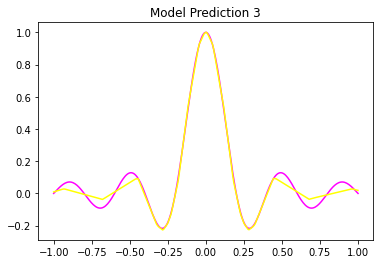

In [ ]:
paramerter_count(m3,1)
model_weight(m3,1,3)
M3epoch_arr,M3loss_arr,M3prediction = train_func(m3,x,y)
model_weight(m3,0,3)
#plot
plt.plot(M3epoch_arr,M3loss_arr,color="blue")
plt.title('Model 3 Loss')
plt.show()
#plot
plt.plot(x.numpy(),y.numpy(),color="magenta")
plt.plot(x,M1prediction.data.numpy(),color="yellow")
plt.title('Model Prediction 3')
plt.show()

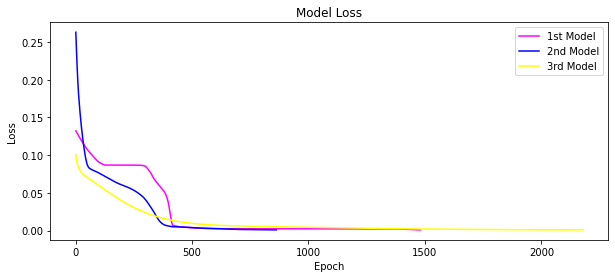

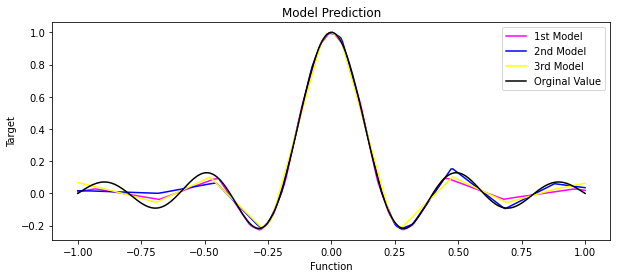

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(M1epoch_arr,M1loss_arr, color = "magenta")
plt.plot(M2epoch_arr,M2loss_arr, color = "blue")
plt.plot(M3epoch_arr,M3loss_arr, color = "yellow")
plt.title('Model Loss')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('EpochVSLoss1.pdf')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(x,M1prediction.data.numpy(),color="magenta")
plt.plot(x,M2prediction.data.numpy(),color="blue")
plt.plot(x,M3prediction.data.numpy(),color="yellow")
plt.plot(x,y.numpy(),color="black")
plt.title('Model Prediction')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.savefig('Model_Prediction1.pdf')
plt.show()

**2nd Funtion**

<ipython-input-11-7e074ebc6177>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


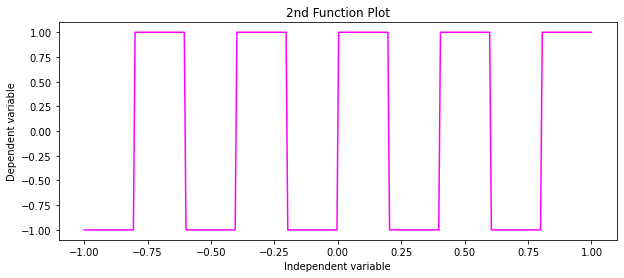

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(1)
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)
y = np.sign(np.sin(5 * np.pi * x))
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

plt.figure(figsize=(10,4))
plt.plot(x, y, color='magenta')
plt.title('2nd Function Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.savefig('2ndfuncplt.png')

plt.show()

n_samples, n_features = x.shape

**ReIntilization of Model again and Train on Function 2**

Total no of parameters in Model :Parameter containing:
tensor([0.3165], requires_grad=True) 571

Model 1 weight and bias before training

hidden1.weight 	 tensor([[ 0.5153],
        [-0.4414],
        [-0.1939],
        [ 0.4694],
        [-0.9414]])
hidden1.bias 	 tensor([ 0.5997, -0.2057,  0.5087,  0.1390, -0.1224])
hidden2.weight 	 tensor([[ 0.1240,  0.0221,  0.1633, -0.1743, -0.0326],
        [-0.0403,  0.0648, -0.0018,  0.3909,  0.1392],
        [-0.1665, -0.2701, -0.0750, -0.1929, -0.1433],
        [ 0.0214,  0.2666,  0.2431, -0.4372,  0.2772],
        [ 0.1249,  0.4242,  0.2952, -0.4075, -0.4252],
        [-0.2157,  0.3927, -0.0745,  0.1914, -0.2078],
        [ 0.4388, -0.1892,  0.3354,  0.0053, -0.2356],
        [ 0.2299, -0.2374,  0.1315, -0.1291, -0.0490],
        [-0.4299, -0.2132,  0.2427, -0.1087,  0.4454],
        [ 0.3585, -0.0209, -0.2985,  0.2723,  0.1388]])
hidden2.bias 	 tensor([-0.2891,  0.2905,  0.2715,  0.3966, -0.2507, -0.0736, -0.0087,  0.0653,
        -0.3394, 

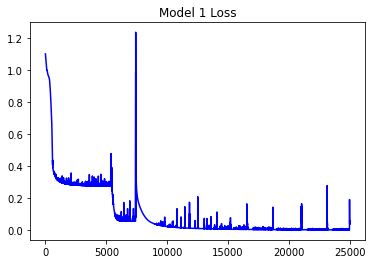

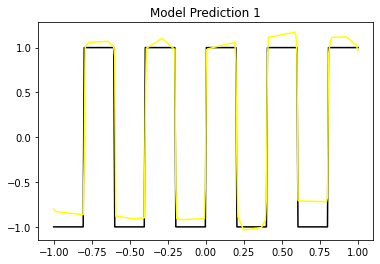

In [ ]:
m1 = M1() # define the network and move to GPU
optimizer = torch.optim.Adam(m1.parameters(), lr=0.0012, weight_decay=1e-4)
loss_func = torch.nn.MSELoss()
paramerter_count(m1,1)
model_weight(m1,1,1)
M1epoch_arr,M1loss_arr,M1prediction = train_func(m1,x,y)
model_weight(m1,0,1)
plt.plot(M1epoch_arr,M1loss_arr,color="blue")
plt.title('Model 1 Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,M1prediction.data.numpy(),color="yellow")
plt.title('Model Prediction 1')
plt.show()


Total no of parameters in Model :Parameter containing:
tensor([0.4854], requires_grad=True) 572

Model 3 weight and bias before training

hidden1.weight 	 tensor([[-0.1516],
        [-0.8101],
        [-0.7396],
        [-0.2935],
        [-0.2215],
        [ 0.1141],
        [-0.2243],
        [ 0.3690],
        [-0.3326],
        [ 0.7340]])
hidden1.bias 	 tensor([ 0.2297, -0.3074,  0.8912,  0.2553, -0.6796, -0.5565,  0.6270,  0.4567,
         0.7808, -0.0768])
hidden2.weight 	 tensor([[ 0.2212,  0.1572,  0.0978, -0.0732,  0.3048,  0.0640, -0.0816, -0.0045,
          0.3109,  0.2124],
        [-0.0234,  0.3100,  0.1389, -0.1684, -0.2878,  0.1838,  0.2966, -0.1842,
          0.1299,  0.0135],
        [-0.0676, -0.0860,  0.0880,  0.0697,  0.2136,  0.1158,  0.1439,  0.2790,
          0.0985,  0.0469],
        [-0.1151,  0.2319,  0.0467,  0.2038,  0.3054, -0.0707,  0.2227, -0.0642,
          0.2854,  0.2489],
        [-0.1133,  0.0113, -0.1381, -0.1279, -0.0640, -0.0022, -0.1102, -0.2985

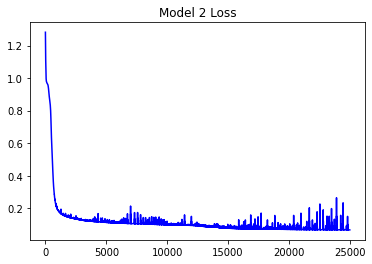

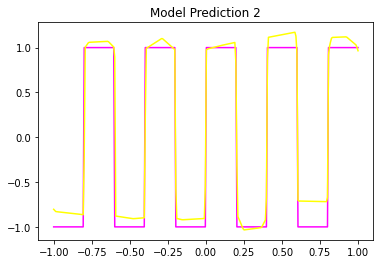

In [ ]:
m2 = M2()    # define the network
#optimizer = torch.optim.RMSprop(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
optimizer = torch.optim.Adam(m2.parameters(), lr=0.0012, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
paramerter_count(m2,3)
model_weight(m2,1,3)
M2epoch_arr,M2loss_arr,M2prediction = train_func(m2,x,y)
model_weight(m2,0,3)
#plot
plt.plot(M2epoch_arr,M2loss_arr,color="blue")
plt.title('Model 2 Loss')
plt.show()
#plot
plt.plot(x.numpy(),y.numpy(),color="magenta")
plt.plot(x,M1prediction.data.numpy(),color="yellow")
plt.title('Model Prediction 2')
plt.show()


Total no of parameters in Model :Parameter containing:
tensor([0.0330], requires_grad=True) 571

Model 3 weight and bias before training

hidden1.weight 	 tensor([[-0.0454],
        [ 0.1646],
        [-0.2346],
        [-0.6331],
        [-0.4523],
        [-0.0664],
        [-0.8181],
        [-0.8082],
        [ 0.1097],
        [-0.6507],
        [-0.5439],
        [-0.0086],
        [-0.5270],
        [ 0.9256],
        [-0.3610],
        [-0.5560],
        [-0.2664],
        [-0.8159],
        [ 0.5152],
        [ 0.8592],
        [-0.5767],
        [-0.3717],
        [ 0.9333],
        [-0.7234],
        [ 0.2708],
        [-0.8148],
        [-0.8900],
        [ 0.0015],
        [-0.5707],
        [ 0.5416],
        [-0.3093],
        [ 0.0099],
        [-0.5221],
        [ 0.4109],
        [ 0.9265],
        [-0.1503],
        [-0.6172],
        [-0.9753],
        [ 0.9583],
        [ 0.4215],
        [ 0.4130],
        [ 0.1703],
        [ 0.5018],
        [ 0.3551],
        [

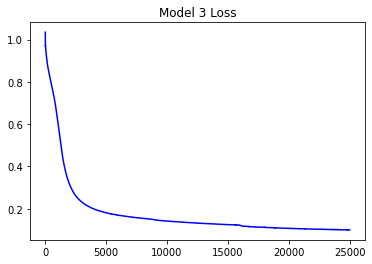

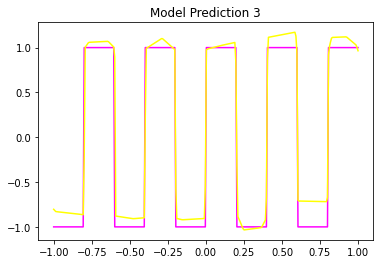

In [ ]:
m3 = M3()     # define the network
optimizer = torch.optim.Adam(m3.parameters(), lr=0.0011, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() # this is for regression mean squared loss
paramerter_count(m3,1)
model_weight(m3,1,3)
M3epoch_arr,M3loss_arr,M3prediction = train_func(m3,x,y)
model_weight(m3,0,3)
#plot
plt.plot(M3epoch_arr,M3loss_arr,color="blue")
plt.title('Model 3 Loss')
plt.show()
#plot
plt.plot(x.numpy(),y.numpy(),color="magenta")
plt.plot(x,M1prediction.data.numpy(),color="yellow")
plt.title('Model Prediction 3')
plt.show()

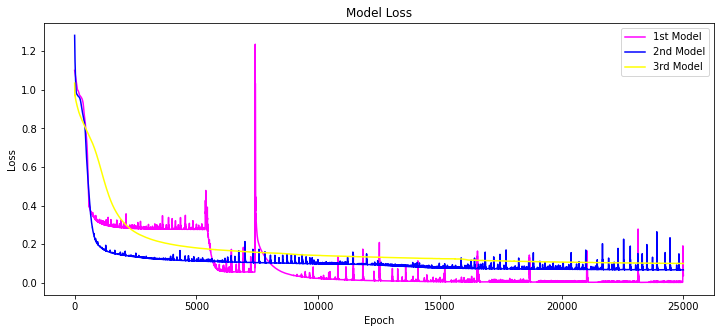

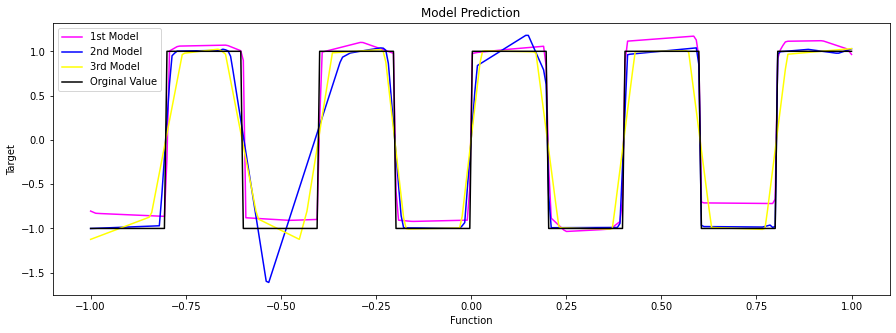

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(M1epoch_arr,M1loss_arr, color = "magenta")
plt.plot(M2epoch_arr,M2loss_arr, color = "blue")
plt.plot(M3epoch_arr,M3loss_arr, color = "yellow")
plt.title('Model Loss')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('EpochVSLoss2.pdf')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(x,M1prediction.data.numpy(),color="magenta")
plt.plot(x,M2prediction.data.numpy(),color="blue")
plt.plot(x,M3prediction.data.numpy(),color="yellow")
plt.plot(x,y.numpy(),color="black")
plt.title('Model Prediction')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'],loc='best')
plt.xlabel('Function')
plt.ylabel('Target')
plt.savefig('Model_Prediction2.pdf')
plt.show()

**1.1_MNIST Actual Data**

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



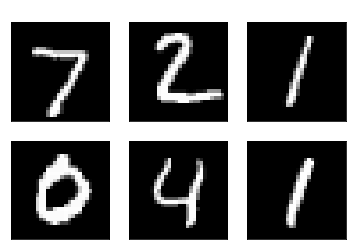

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

torch.manual_seed(1)

# Load and prepare MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=600, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

# Plot a sample of test data
test_iter = iter(test_loader)
example_data, example_targets = next(test_iter)
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title("Actual Val: {}".format(example_targets[i]),color='white')
    plt.xticks([])
    plt.yticks([])
plt.show()


In [ ]:
def trainFunc(model,num_epochs):
    model.train()
    n_total_steps = len(train_loader)
    train_losses = []
    train_epoch = []
    train_acc = []
    not_converged =True
    epoch = 0
    trainAvgLossArr = []
    while not_converged:
        epoch += 1
        n_correct = 0
        n_samples = 0
        lossSum = 0

        for i, (images, labels) in enumerate(train_loader):  
            # Forward pass
            prediction = model(images)
            loss = loss_func(prediction, labels)
            lossSum += loss.detach().numpy()
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            acc = 100.0 * n_correct / n_samples

            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}',end='\r',flush=True)
                train_epoch.append(epoch)
                train_losses.append(loss.item())
                print(f'Epoch [{epoch}/{num_epochs}], Accuracy : {acc} %',end='\r',flush=True)
                train_acc.append(acc)

                if epoch == num_epochs:
                        print(f"Max Epoch Reached, Loss: {loss.item():.4f}, Accuracy:{acc:2f}%")
                        not_converged = False
                elif (epoch > 5) and  (train_losses[-1] < 0.001):
                    if abs(train_losses[-3] - train_losses[-2]) < 1.0e-05 and abs(train_losses[-2] - train_losses[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",train_losses[-1])
                        not_converged = False

        trainAvgLossArr.append(lossSum/i+1)
        
                        
    return train_epoch,train_losses,train_acc,trainAvgLossArr

In [ ]:
# Hyper-parameters 
input_size = 784 # 28x28
max_epochs = 15
learning_rate = 0.001
kernel_size = 4
weight_decay_val = 1e-4
dropout = 0.25
class CNN1(nn.Module):
    def __init__(self,):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(320, 50) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(50, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN   
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))        #Fully Connected NN           
        x = self.fc3(x)                #O/P Layer       
        return x

Total no of parameters in Model 1: 25550
Max Epoch Reached, Loss: 0.0919, Accuracy:98.191667%


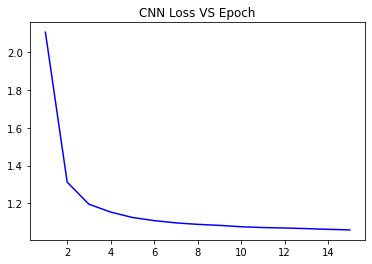

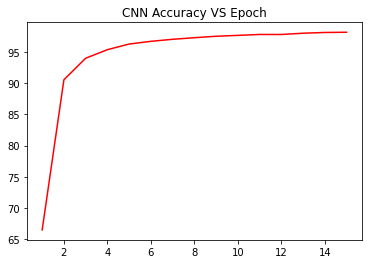

In [ ]:
torch.manual_seed(1)

cnn1 = CNN1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn1.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

a=[]
for i in cnn1.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 1:', np.sum(a),)
train_epoch,train_losses,train_acc,trainAvgLossArr =trainFunc(cnn1,max_epochs)
plt.plot(train_epoch,trainAvgLossArr,color="blue")
plt.title('CNN Loss VS Epoch')
plt.show()
plt.plot(train_epoch,train_acc,color="red")
plt.title('CNN Accuracy VS Epoch')
plt.show()

In [ ]:
def testFunc (model):
    model.eval()
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        n_class_correct = [0 for i in range(10)]
        n_class_samples = [0 for i in range(10)]
        for test_images, test_labels in test_loader:
            outputs = model(test_images)
            # max returns (value ,index)
            _, predicted = torch.max(outputs, 1)
            n_samples += test_labels.size(0)
            n_correct += (predicted == test_labels).sum().item()
            
            for i in range(100):
                label = test_labels[i]
                pred = predicted[i]
                if (label == pred):
                    n_class_correct[label] += 1
                n_class_samples[label] += 1

        netTest_acc1 = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network: {netTest_acc1} %')

        for i in range(10):
            acc = 100.0 * n_class_correct[i] / n_class_samples[i]
            print(f'Accuracy of {i}: {acc} %')
    
    return netTest_acc1
cnn1TestAcc = testFunc(cnn1)

Accuracy of the network: 98.71 %
Accuracy of 0: 99.48979591836735 %
Accuracy of 1: 99.03083700440529 %
Accuracy of 2: 99.2248062015504 %
Accuracy of 3: 98.91089108910892 %
Accuracy of 4: 98.37067209775968 %
Accuracy of 5: 98.54260089686099 %
Accuracy of 6: 99.16492693110648 %
Accuracy of 7: 97.76264591439688 %
Accuracy of 8: 98.870636550308 %
Accuracy of 9: 97.7205153617443 %


In [ ]:
class CNN2(nn.Module):
    def __init__(self,):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(20*kernel_size*kernel_size, 50) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.fc2 = nn.Linear(50,50)
        self.fc3 = nn.Linear(50,40)
        self.fc4 = nn.Linear(40,30)
        self.fc5 = nn.Linear(30, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN       
        x = F.relu(self.fc2(x))        #Fully Connected NN 
        x = F.relu(self.fc3(x))        #Fully Connected NN 
        x = F.relu(self.fc4(x))        #Fully Connected NN
        #x = F.relu(self.fc5(x))        #Fully Connected NN 
        x = self.fc5(x)                #O/P Layer       
        return x
torch.manual_seed(1)

cnn2 = CNN2()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn2.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

a=[]

for i in cnn2.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 2:', np.sum(a),)
train_epoch2,train_losses2,train_acc2,trainAvgLossArr2=trainFunc(cnn2,max_epochs)

Total no of parameters in Model 2: 25570
Max Epoch Reached, Loss: 0.0842, Accuracy:97.850000%


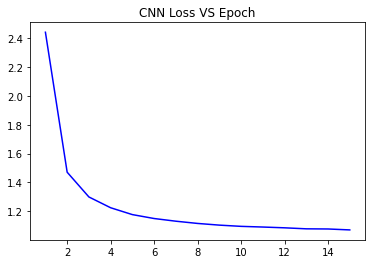

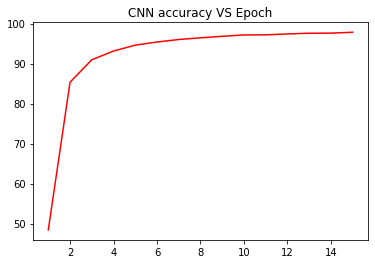

Accuracy of the network: 98.0 %
Accuracy of 0: 99.18367346938776 %
Accuracy of 1: 99.03083700440529 %
Accuracy of 2: 98.15891472868218 %
Accuracy of 3: 96.43564356435644 %
Accuracy of 4: 98.87983706720978 %
Accuracy of 5: 97.6457399103139 %
Accuracy of 6: 98.74739039665971 %
Accuracy of 7: 98.34630350194553 %
Accuracy of 8: 98.35728952772074 %
Accuracy of 9: 95.14370664023787 %


In [ ]:
#plot
plt.plot(train_epoch2,trainAvgLossArr2,color="blue")
plt.title('CNN Loss VS Epoch')
plt.show()
#plot
plt.plot(train_epoch2,train_acc2,color="red")
plt.title('CNN accuracy VS Epoch')
plt.show()
cnn2TestAcc = testFunc(cnn2)

Total no of parameters in Model 3: 25621
Max Epoch Reached, Loss: 0.0247, Accuracy:98.911667%


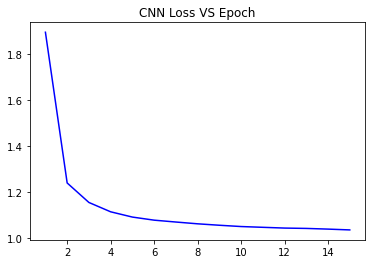

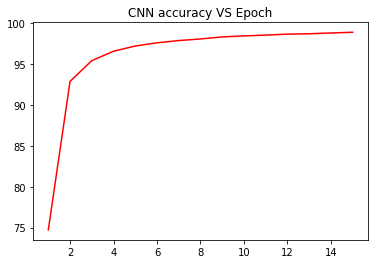

Accuracy of the network: 98.8 %
Accuracy of 0: 99.38775510204081 %
Accuracy of 1: 99.11894273127753 %
Accuracy of 2: 99.2248062015504 %
Accuracy of 3: 99.10891089108911 %
Accuracy of 4: 99.38900203665987 %
Accuracy of 5: 97.53363228699551 %
Accuracy of 6: 98.8517745302714 %
Accuracy of 7: 98.44357976653697 %
Accuracy of 8: 98.66529774127311 %
Accuracy of 9: 98.1169474727453 %


In [ ]:
#Model 3
class CNN3(nn.Module):
    def __init__(self,): 
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 15, 5)
        self.fc1 = nn.Linear(15*4*4, 86)
        self.fc2 = nn.Linear(86, 10)
       

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
     
        x = x.view(-1, 15*4*4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x
torch.manual_seed(1)

cnn3 = CNN3()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn3.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

a=[]

for i in cnn3.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 3:', np.sum(a))
train_epoch3,train_losses3,train_acc3,trainAvgLossArr3=trainFunc(cnn3,max_epochs)
#plot
plt.plot(train_epoch3,trainAvgLossArr3,color="blue")
plt.title('CNN Loss VS Epoch')
plt.show()
#plot
plt.plot(train_epoch3,train_acc3,color="red")
plt.title('CNN accuracy VS Epoch')
plt.show()
cnn3TestAcc = testFunc(cnn3)

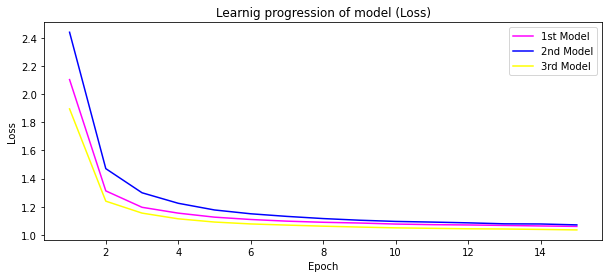

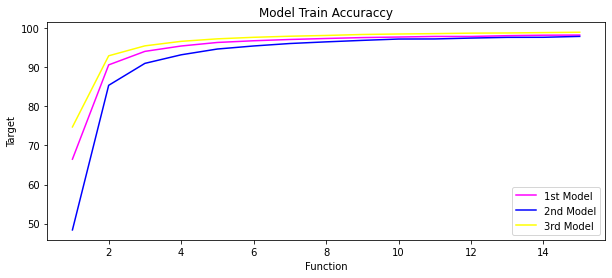

CNN1 Test Accuracy: 98.71 % 
CNN2 Test Accuracy: 98.0 % 
CNN3 Test Accuracy: 98.8 %


In [ ]:
plt.figure(figsize=(10,4))
plt.plot(train_epoch,trainAvgLossArr, color = "magenta")
plt.plot(train_epoch2,trainAvgLossArr2, color = "blue")
plt.plot(train_epoch3,trainAvgLossArr3, color = "yellow")
plt.title('Learnig progression of model (Loss)')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('EpochVSLossCNN.pdf')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(train_epoch,train_acc,color="magenta")
plt.plot(train_epoch2,train_acc2,color="blue")
plt.plot(train_epoch3,train_acc3,color="yellow")
plt.title('Model Train Accuraccy')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.savefig('Model_PredictionCNN.pdf')
plt.show()

print('CNN1 Test Accuracy:',cnn1TestAcc,'%','\nCNN2 Test Accuracy:',cnn2TestAcc,'%','\nCNN3 Test Accuracy:',cnn3TestAcc,'%')